<table align="center" width="100%">
    <tr>
        <td width="30%">
            <img src="Picture1.png" width="100%">
        </td>
        <td>
            <div align="center">
                <font color="#A52A2A" size="6px">
                    <b>Exploratory Data Analysis<br>Voice Call Quality Analysis for Superior Customer Experience & Retention</b>
                </font>
            </div>
        </td>
    </tr>
</table>


## Overview
#### Business Problem Understanding: 
The telecom industry is highly competitive, with customer retention being a critical factor for success. Poor voice call quality is a significant driver of customer dissatisfaction and churn. The Telecom Regulatory Authority of India (TRAI) has collected extensive data on voice call quality and customer experience through the MyCall app, providing a rich dataset for analysis.

#### Business Objective: 
The primary objective is to leverage the provided dataset to develop predictive models that identify and mitigate factors affecting voice call quality and customer experience. By doing so, the goal is to:
* Improve overall call quality.
* Enhance customer satisfaction.
* Reduce churn rates.
* Optimize network resources.

This project aims to investigate the relationship between voice call quality and customer churn by analyzing historical customer experience data (3 months - July ,August, September - Year 2018), with the goal of developing a predictive model that forecasts churn and supports proactive customer retention efforts.

### About the dataset (voice-call-quality-customer-experience)
The data records the voice-call-quality-customer-experience for the month July , August ,September - Year 2018

**Operator**: This refers to the telecom company providing the service (e.g., Airtel, Vodafone, Jio). It helps in identifying which operator's network is being assessed.

**In Out Travelling**:
Indoor: Calls made or received inside buildings.
Outdoor: Calls made or received outside buildings.
Travelling: Calls made or received while moving, such as in a vehicle.

**Network Type**: Indicates the type of mobile network used during the call (e.g., 3G, 4G, 5G). Different network type.

**Rating**: Customer ratings for call quality, usually on a scale (e.g., 1-5 stars). This provides insights into user satisfaction and perceived call quality.

**Call Drop Category**:
* Satisfactory: Calls rated positively by customers.
* Call Dropped: Calls that were unexpectedly disconnected.
* Poor Voice Quality: Calls with unsatisfactory sound quality.

**Longitude** ,**Latitude** : Geolocation coordinates indicating the exact location where the call was made or received. This helps in mapping call quality issues to specific geographic regions.

If Latitude and Longitude is 0,0 or -1,-1 it means user Mobile has disable the functionality to let Android Api to provide that details to My CALL APP

**State Name**: The state in which the call occurred. This allows for regional analysis of call quality and identifying areas with significant issues.

## Table of Content

1. **Data Collection and Import**
2. **Data Inspection and Overview**
3. **Exploratory Data Analysis (EDA)**
4. **Feature Engineering**
5. **Descriptive Statistics**
6. **Data Visualization**

## 1. Data Collection and Import:

In [86]:
# Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')
from geopy.geocoders import Nominatim

In [87]:
# Display settings or Output formatting categories in both pandas and NumPy.
pd.set_option('display.max_columns', None) # This option controls the maximum number of columns displayed
pd.set_option('display.width', None) # Adjusts how wide a DataFrame is displayed in the console or terminal.
np.set_printoptions(threshold=np.inf) # All elements of the array will be printed,
plt.rcParams['figure.figsize']=[15,8] # Used to set the default figure size for all plots globally.
np.set_printoptions(suppress = True)  # Prevents NumPy from using scientific notation (e.g., 1e-10) for small floating-point numbers.

In [88]:
# Loading the dataset for three months - July , August, September
df_july = pd.read_csv('MyCall_Data_July_2018.csv')
df_aug = pd.read_csv('MyCall_Data_August_2018.csv')
df_sept = pd.read_csv('MyCall_Data_September_2018.csv')

In [89]:
# Adding the column month in all the three dataframes 
df_july['Month'] = 'July'
df_aug['Month'] = 'August'
df_sept['Month'] = 'September'

In [90]:
# Concating the 3 dataframes into one 
df = pd.concat([df_july,df_aug,df_sept],ignore_index= True)

## 2. Data Inspection and Overview:

In [92]:
# Showing top 5 records
df.head()

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Month
0,RJio,Indoor,4G,1,Call Dropped,19.064262,72.996913,Maharashtra,July
1,Vodafone,Indoor,Unknown,5,Satisfactory,28.627734,77.435619,Uttar Pradesh,July
2,Vodafone,Indoor,4G,5,Satisfactory,28.627734,77.435617,Uttar Pradesh,July
3,RJio,Indoor,4G,4,Satisfactory,23.814198,78.756997,Madhya Pradesh,July
4,RJio,Indoor,4G,1,Call Dropped,19.064258,72.996909,Maharashtra,July


In [93]:
# No of Rows and Columns in the Dataset 
print(f'No.of Rows : {df.shape[0]}')
print(f'No.of Columns : {df.shape[1]}')

No.of Rows : 170783
No.of Columns : 9


In [94]:
# Checking the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170783 entries, 0 to 170782
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Operator            170783 non-null  object 
 1   In Out Travelling   170783 non-null  object 
 2   Network Type        170783 non-null  object 
 3   Rating              170783 non-null  int64  
 4   Call Drop Category  170783 non-null  object 
 5   Latitude            170783 non-null  float64
 6   Longitude           170783 non-null  float64
 7   State Name          153183 non-null  object 
 8   Month               170783 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 11.7+ MB


#### Inference 
* There are 6 categorical columns - 'Operator', 'IN Out Travelling', 'Network Type', 'Call Drop Category', 'State Name', 'Month'.
* There are 3 Numerical columns - 'Rating' , 'Latitude' , 'Longitude'.
* The "State Name" column contains null values. To ensure we account for non-standard missing values, we need to examine the unique values in each column.

## 3. Exploratory Data Analysis (EDA):

In [97]:
# Store the  numerical and categorical columns in seperate variables
df_num = df.select_dtypes(include = np.number).columns
df_cat = df.select_dtypes(exclude = np.number).columns  

In [98]:
# To identify non-standard missing values, we will review the unique values of each variable.
for i in df_cat:
    print(i)
    print(df[i].unique())
    print('----------------------------------------------------------------------------')

Operator
['RJio' 'Vodafone' 'Airtel' 'Idea' 'BSNL' 'Tata' 'RComm' 'MTNL' 'Other'
 'Telenor' 'Aircel']
----------------------------------------------------------------------------
In Out Travelling
['Indoor' 'Outdoor' 'Travelling']
----------------------------------------------------------------------------
Network Type
['4G' 'Unknown' '3G' '2G']
----------------------------------------------------------------------------
Call Drop Category
['Call Dropped' 'Satisfactory' 'Poor Voice Quality']
----------------------------------------------------------------------------
State Name
['Maharashtra' 'Uttar Pradesh' 'Madhya Pradesh' 'Rajasthan' nan 'Bihar'
 'Telangana' 'Haryana' 'Kerala' 'Andhra Pradesh' 'Tamil Nadu' 'Gujarat'
 'West Bengal' 'Uttarakhand' 'Kashmir' 'Odisha'
 'Andaman and Nicobar Islands' 'Karnataka' 'Assam' 'Tripura' 'NCT'
 'Meghalaya' 'Jharkhand' 'Himachal Pradesh' 'Dadra and Nagar Haveli'
 'Punjab' 'Chhattisgarh' 'Goa' 'Central Region' 'Pondicherry'
 'Gyeonggi-do' 'Chandigar

#### Inference:

* The 'Network Type' column contains "Unknown" as a missing value, which we will retain as is.
* The 'State Name' column has "N/A-1" as a placeholder for missing values, which will be treated as such.

In [100]:
# Replacing the Non-Standard Missing values with np.nan
df['State Name'].replace('N/A-1',np.nan, inplace =True)

In [101]:
# We will examine the value counts of each variable to detect any inconsistencies and address them accordingly.
for i in df_cat:
    print(df[i].value_counts())
    print('----------------------------------------')

Operator
RJio        69581
Airtel      36522
Vodafone    32596
BSNL        17083
Idea        12857
MTNL         1413
Tata          608
Telenor        43
Other          33
RComm          26
Aircel         21
Name: count, dtype: int64
----------------------------------------
In Out Travelling
Indoor        116842
Outdoor        32639
Travelling     21302
Name: count, dtype: int64
----------------------------------------
Network Type
4G         97427
3G         36985
Unknown    27514
2G          8857
Name: count, dtype: int64
----------------------------------------
Call Drop Category
Satisfactory          113482
Poor Voice Quality     43297
Call Dropped           14004
Name: count, dtype: int64
----------------------------------------
State Name
Maharashtra                    33428
West Bengal                    10451
Rajasthan                      10438
Uttar Pradesh                  10210
Gujarat                         9174
NCT                             8823
Karnataka               

#### Inference
* In the 'Operator' column, operators with a count below 100 will be grouped into a single category labeled 'Others'.
* In the 'State Name' column, records with a count of 1 or 2 and all foreign countries will be removed.
* In the 'State Name' column, standardizing 'NCT' values by replacing them with 'Delhi', as it is the most commonly specified location."

In [103]:
# Grouping the operators that has count below 100
df['Operator'].replace(['RComm', 'Other', 'Telenor', 'Aircel'],'Others',inplace = True)

In [104]:
# Removing the records that has less count in the State Name
df = df[~df['State Name'].isin(['Central Kalimantan','Chhukha','Sao Paulo','Novosibirsk','Eastern Region','Gyeonggi-do','Mid Western','Leningrad',
        'Daman and Diu','Central Region','Arunachal Pradesh','Central Region','Manipur'])]

In [105]:
# Standardizing 'NCT' values by replacing them with 'Delhi', as it is the most commonly specified location."
df['State Name'].replace('NCT','Delhi',inplace = True)

In [106]:
df.shape 
#32 records are removed

(170751, 9)

In [107]:
# Treating null values for numerical columns - checking for non-standard missing values 
df['Rating'].unique()

array([1, 5, 4, 3, 2], dtype=int64)

In [108]:
unique_values = []
for i in df['Longitude']:
    if i< 68.556 :  # Minimum Longitude in India
        if i not in unique_values:
            unique_values.append(i)
    if i > 97.25 :  # Maximum Longitude in India
        if i not in unique_values:
            unique_values.append(i)
    
print(unique_values)

[-1.0, 0.0]


In [109]:
unique_values = []
for i in df['Latitude']:
    if i< 6.746 :  # Minimum Latitude in India
        if i not in unique_values:
            unique_values.append(i)
    if i > 37.6 :  # Maximum Latitude in India
        if i not in unique_values:
            unique_values.append(i)
    
print(unique_values)

[-1.0, 0.0]


#### Inference 
* Latitude and Longitude has non standard missing values : (-1) , 0

In [111]:
# Replacing the Non standard missing values in 'Latitude' & 'Longitude' like (-1), (0) into null values 
df['Latitude'].replace([-1,0],np.nan,inplace = True)
df['Longitude'].replace([-1,0],np.nan,inplace = True)

In [112]:
# Rechecking the count on the null values present after replacement with np.nan
df.isnull().sum()

Operator                  0
In Out Travelling         0
Network Type              0
Rating                    0
Call Drop Category        0
Latitude              32677
Longitude             32677
State Name            32678
Month                     0
dtype: int64

#### Inference - 
* For the record with a missing State Name but valid latitude and longitude, the geopy library will be used to fetch and fill the corresponding State Name based on the geographic coordinates.
* We will treat the remaining rows of missing values with logical imputation.

In [114]:
# Fetching that one record that has valid latitude and longitude but State name is missing 
df_missing_state = df[(df['State Name'].isnull()) & (~(df['Latitude'].isnull()))]
df_missing_state

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Month
167342,Idea,Outdoor,3G,5,Satisfactory,28.54338,77.33032,NaN,September


#### About Geopy Library
* Nominatim is a geocoding service that uses the OpenStreetMap data to convert addresses or place names into geographic coordinates (latitude and longitude) and vice versa.
* It is commonly used to perform:
    * Forward geocoding: Converting addresses or place names into coordinates.
    * Reverse geocoding: Converting coordinates into human-readable addresses.

In [116]:
# Fetching the 'State Name' using geopy library
# Initialize the geolocator
geolocator = Nominatim(user_agent="geoapi")

# Define a Function for fetching the State Name
def get_state_name(lat, lon):
    try:
        # Reverse geocode the latitude and longitude
        location = geolocator.reverse((lat, lon), language='en')
        # Extract the state name from the location's address
        if location and 'state' in location.raw['address']:
            return location.raw['address']['state']
        else:
            return None
    except Exception as e:
        print(f"Error for coordinates ({lat}, {lon}): {e}")
        return None

In [117]:
# Replacing the 'State Name' using the function created in the above cell
df_missing_state['State Name'] = df_missing_state.apply(lambda row: get_state_name(row['Latitude'], row['Longitude']), axis=1)
df_missing_state

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Month
167342,Idea,Outdoor,3G,5,Satisfactory,28.54338,77.33032,Uttar Pradesh,September


In [118]:
# Imputing the 'State Name' in the original dataframe
df.at[167342, 'State Name'] = 'Uttar Pradesh'

In [119]:
# Rechecking the number of null values
df.isnull().sum()

Operator                  0
In Out Travelling         0
Network Type              0
Rating                    0
Call Drop Category        0
Latitude              32677
Longitude             32677
State Name            32677
Month                     0
dtype: int64

#### Null Value Treatment 

* Performing logical imputation by grouping all the columns and using the mode to fill the missing values.

In [122]:
# Logical Imputation for null value treatment of State Names - using group by and mode

# Group by the relevant columns and find the most common state name (mode)
grouped = df.groupby(['Operator', 'In Out Travelling', 'Network Type', 'Rating', 'Call Drop Category'])['State Name'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Convert the grouped result to a dictionary
state_mapping = grouped.to_dict()

df['State Name'] = df.apply(lambda row: state_mapping.get((row['Operator'], row['In Out Travelling'], row['Network Type'], 
                    row['Rating'], row['Call Drop Category']),row['State Name'])  # Keep the existing value if no match is found
                    if pd.isna(row['State Name']) else row['State Name'],axis=1)

In [123]:
# Rechecking the number of null values
df.isnull().sum()

Operator                  0
In Out Travelling         0
Network Type              0
Rating                    0
Call Drop Category        0
Latitude              32677
Longitude             32677
State Name               34
Month                     0
dtype: int64

In [124]:
# Dropping the 34 records where the state name's null values could not be logically imputed.
df.dropna(subset = 'State Name',inplace = True)

In [125]:
# Logical imputation for 'lat' and 'long'
grouped_lat_long = df.groupby(['Operator', 'In Out Travelling', 'Network Type', 'State Name']).agg(
    Latitude=('Latitude', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
    Longitude=('Longitude', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan))

# Convert the group result to a dictionary
lat_long_mapping = grouped_lat_long.to_dict(orient='index')

# Function to impute 'Latitude' and 'Longitude'
def impute_lat_long(row):
    key = (row['Operator'], row['In Out Travelling'], row['Network Type'], row['State Name'])
    if pd.isna(row['Latitude']) or pd.isna(row['Longitude']):
        lat_long = lat_long_mapping.get(key, {})
        row['Latitude'] = row['Latitude'] if not pd.isna(row['Latitude']) else lat_long.get('Latitude')
        row['Longitude'] = row['Longitude'] if not pd.isna(row['Longitude']) else lat_long.get('Longitude')
    return row

# Apply the imputation function row-wise
df = df.apply(impute_lat_long, axis=1)

In [126]:
# Rechecking the number of null values
df.isnull().sum()

Operator              0
In Out Travelling     0
Network Type          0
Rating                0
Call Drop Category    0
Latitude              0
Longitude             0
State Name            0
Month                 0
dtype: int64

## 4. Feature Engineering:

* Creating a new feature to categorize 'State Names' into regional groups such as North, South, East, West, Central and North-East based on geographical locations.

* This will involve generating a new column 'Region' that assigns each state to a specific region, which can be useful for modeling to capture regional trends or patterns in the data

In [129]:
# Define state-to-region mapping for Indian states
state_region_mapping = {
# North India
    'Kashmir': 'North','Himachal Pradesh': 'North','Punjab': 'North','Haryana': 'North','Delhi': 'North','Uttarakhand': 'North',
    'Uttar Pradesh': 'North','Chandigarh' :'North',
# South India
    'Kerala': 'South','Tamil Nadu': 'South','Karnataka': 'South','Andhra Pradesh': 'South','Telangana': 'South','Pondicherry':'South',
# East India
    'West Bengal':'East','Odisha': 'East','Jharkhand': 'East','Bihar': 'East', 'Andaman and Nicobar Islands':'East',
# West India
    'Rajasthan': 'West','Gujarat': 'West','Goa': 'West','Maharashtra': 'West', 'Dadra and Nagar Haveli':'West',
# Central India
    'Madhya Pradesh': 'Central','Chhattisgarh': 'Central',
# Northeast India
    'Assam': 'Northeast','Arunachal Pradesh': 'Northeast','Manipur': 'Northeast','Meghalaya': 'Northeast','Mizoram': 'Northeast',
    'Nagaland': 'Northeast','Tripura': 'Northeast','Sikkim': 'Northeast'}
# Map states to regions
df['Region'] = df['State Name'].map(state_region_mapping)

In [130]:
df.head(2)

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Month,Region
0,RJio,Indoor,4G,1,Call Dropped,19.064262,72.996913,Maharashtra,July,West
1,Vodafone,Indoor,Unknown,5,Satisfactory,28.627734,77.435619,Uttar Pradesh,July,North


In [131]:
# Final Shape of dataset 
df.shape

(170717, 10)

In [132]:
# Extracting the cleaned dataset for model building 
df.to_csv('Capstone_3Months_Null_impt.csv',index = False )

## 5. Descriptive Statistics:

In [134]:
# For Numerical Column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,170717.0,3.457506,1.522354,1.000000,2.000000,4.000000,5.000000,5.000000
Latitude,170717.0,21.010879,5.410369,8.084712,18.447802,20.310055,25.795465,32.987526
Longitude,170717.0,77.768154,4.791633,68.965040,73.794660,77.157185,79.096350,95.629638


#### Inference - From Descriptive Statistics for Numerical Columns

* Target Variable (Rating):
- The average rating is 3.46, which suggests a slight bias towards higher ratings.
- Inference: The distribution of the Rating variable appears skewed toward higher values, suggesting potential class imbalance, where higher ratings  (4 and 5) are dominant.

Latitude:
- Min: 8.08 (close to southern latitudes of India).
- Max: 32.99 (northern regions of India).
- Inference: Latitude values gives the geographical data spans a wide range from southern to northern India.

Longitude:
- Min: 68.96 (westernmost parts of India, e.g., Gujarat).
- Max: 95.63 (easternmost regions of India, e.g., Arunachal Pradesh).
- Inference: Longitude values confirm coverage from western to eastern India, indicating a geographically diverse dataset.

In [136]:
# For Categorical Column
df.describe(include = 'object')

,Operator,In Out Travelling,Network Type,Call Drop Category,State Name,Month,Region
count,170717,170717,170717,170717,170717,170717,170717
unique,8,3,4,3,29,3,6
top,RJio,Indoor,4G,Satisfactory,Maharashtra,July,West
freq,69563,116820,97401,113459,45526,63646,70050


#### Inference - From Descriptive Statistics for Categorical Columns

* RJio is the leading operator in this dataset, indicating it has a significant market share or user base.
* A majority of the call records are from indoor environments, which could be due to higher stability of indoor networks or user preference.
* The prevalence of 4G network usage indicates that it is the dominant technology among users in this dataset, as the boom began from the period 2016.
* Most call drops are categorized as "Satisfactory," implying that the service quality is generally acceptable but could still have some issues.
* Maharashtra has the highest number of call records,indicating a larger user base or more reporting from this state.
* The West region appears to have the highest number of records, which could correlate with population density or network infrastructure.

## 6. Data Visualization:

### Univariate Analysis

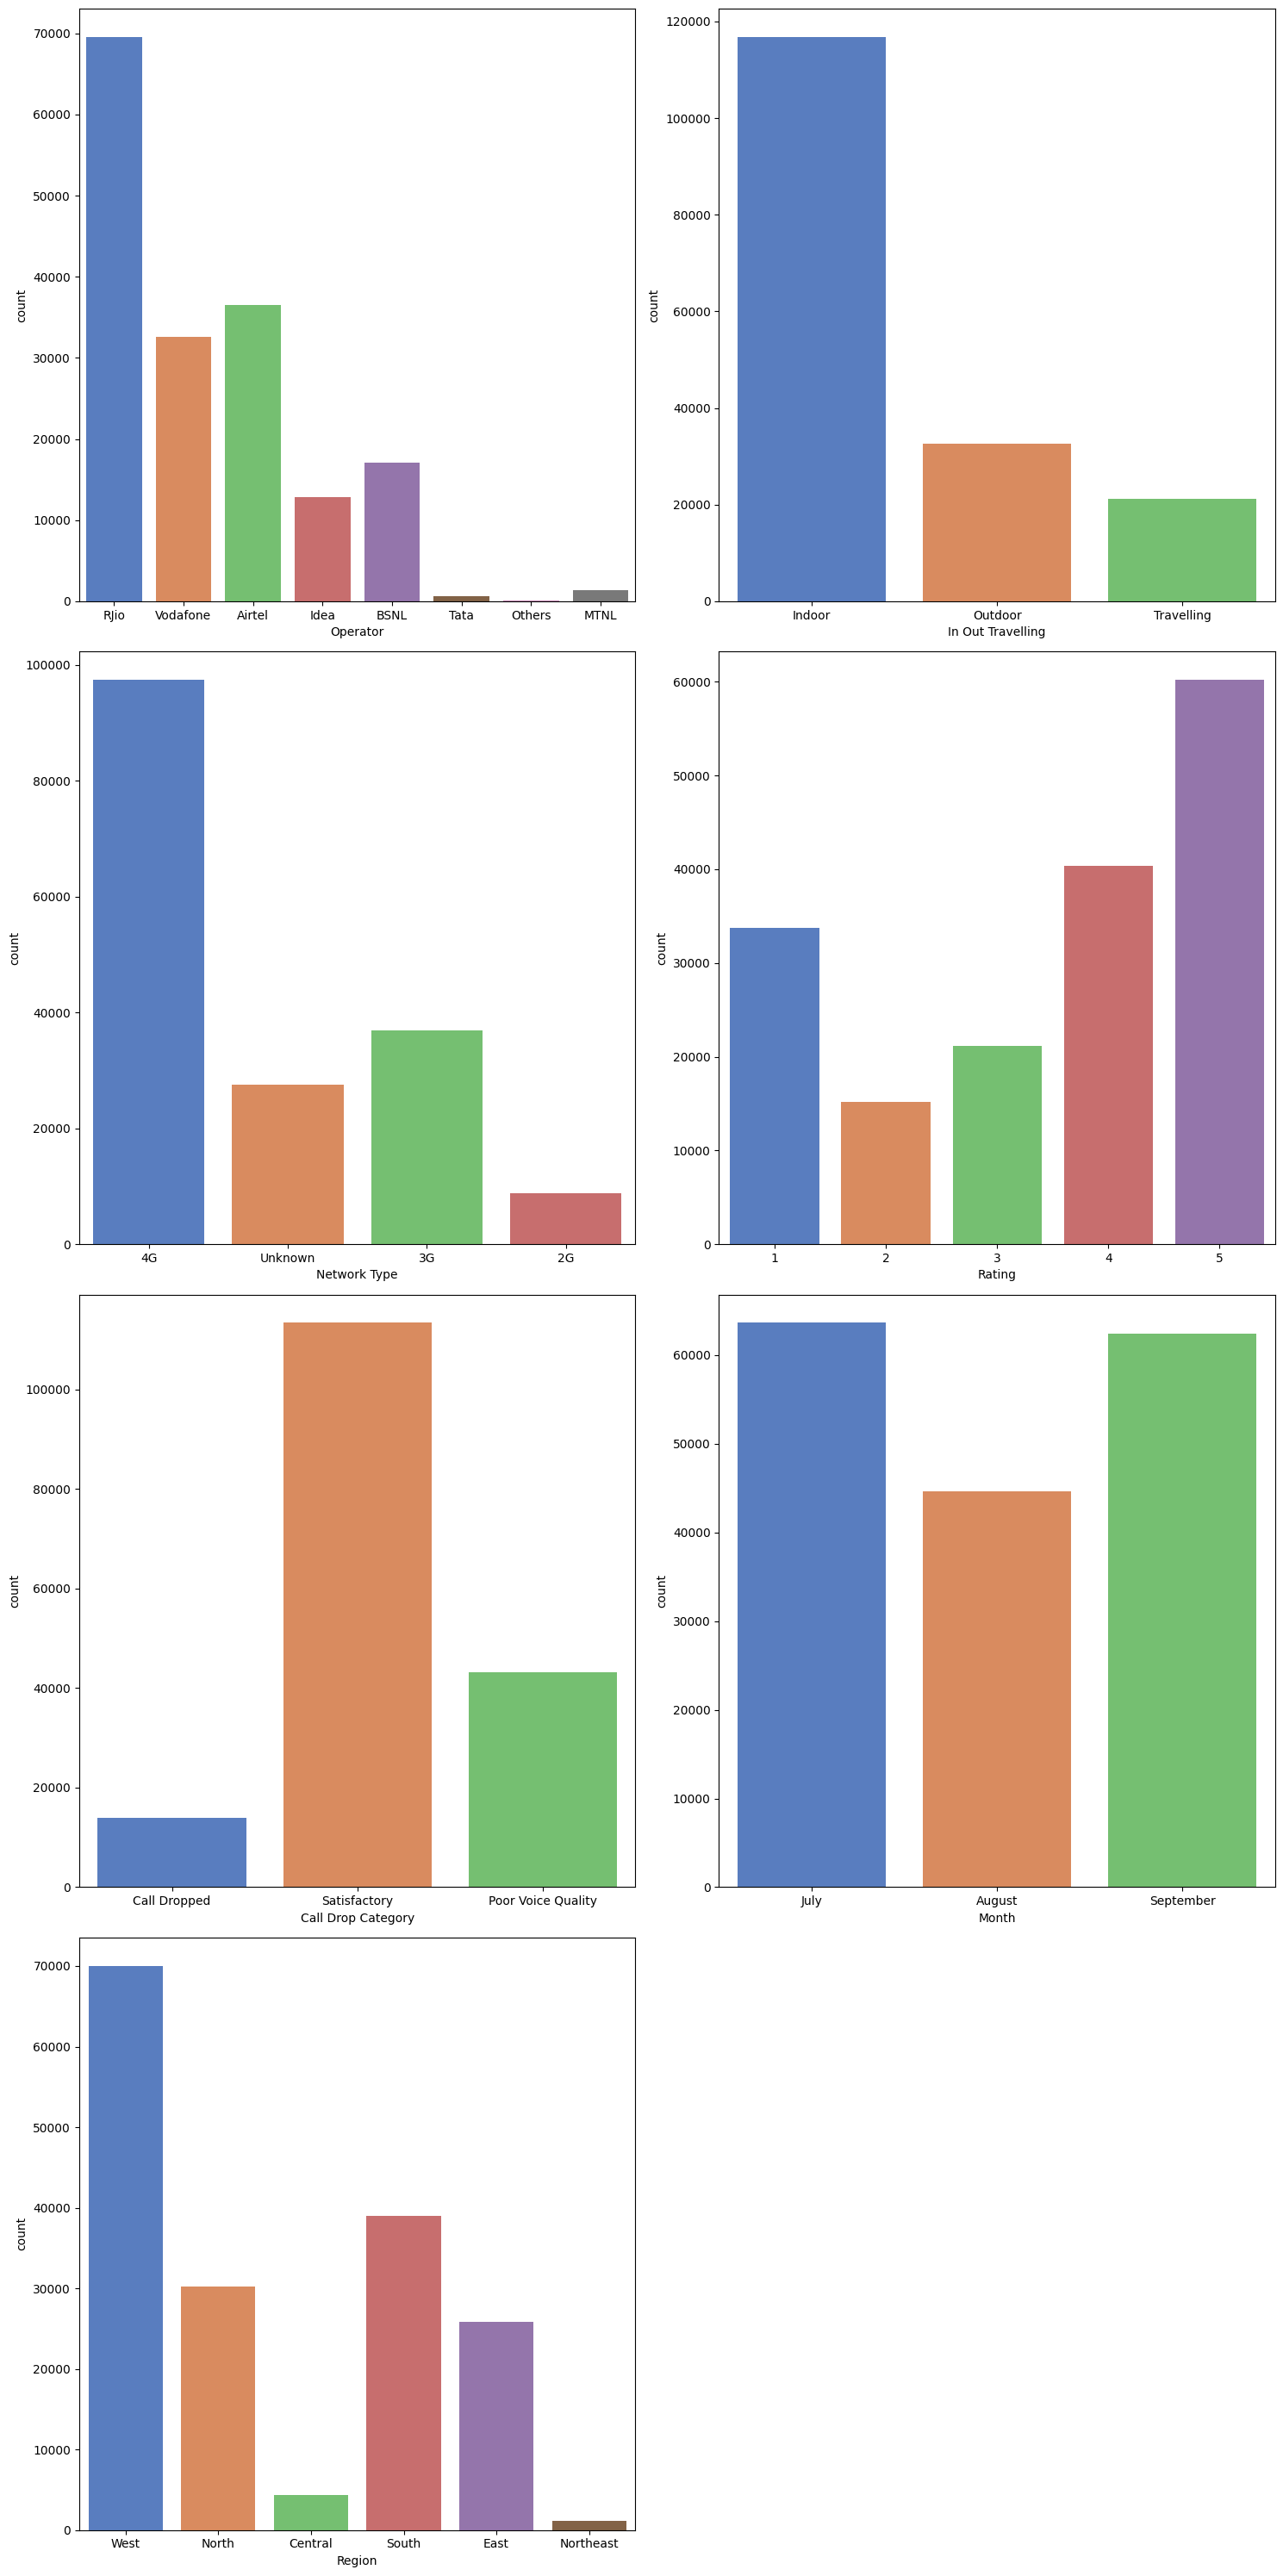

In [140]:
plt.figure(figsize= [15,30])
t = 1 
for i in df.drop(columns= ['Latitude', 'Longitude', 'State Name']).columns:
    plt.subplot(4,2,t)
    sns.countplot(x = df[i],palette = 'muted')
    t += 1
plt.tight_layout()
plt.show()

#### Insights - Univariate Analysis
##### 1. Operator
* Distribution: The majority of MYCall App users are on the RJio network, which holds the largest share, followed by Airtel and then Vodafone.
* Inference: RJio dominates the user base, which could indicate its market leadership or preference in the dataset's region,likely driven by its widespread 4G availability and affordable plans.
* Other Insights: Operators like MTNL, Tata, and Others have very few users, which could suggest a niche market or underrepresentation in the year 2018.
##### 2. In/Out Travelling
* Distribution: The majority of users are either Indoor followed by Outdoor, with relatively fewer users traveling.
* Inference: The app is primarily used when users are indoors or outdoors, indicating more local use.
##### 3. Network Type
* Distribution: 4G is the most commonly used network type, followed by 3G and 2G.
* Inference: The dataset indicates a strong preference for 4G, which aligns with current trends in mobile usage in India. 3G is still widely used, but 2G is far less common.
##### 4. Rating:
* Distribution: The majority of users rated the service 5, followed by 4.
* 1 and 2 ratings are also significant, suggesting some dissatisfaction.
* Inference: The app receives mostly positive feedback, with 5 and 4 being the dominant ratings. This suggests that users are generally satisfied with the app or service.However, the presence of many 1, 2, and 3 ratings indicates areas where users are not fully satisfied. These users may have encountered issues that could require investigation (e.g., call drops, network quality).
##### 5. Call Drop Category
* Distribution: Most users report Satisfactory call quality, followed by Poor Voice Quality and a small proportion reporting Call Dropped.
* Inference: A large proportion of users experience satisfactory call quality, suggesting that network coverage is generally good. However, the number of users reporting poor voice quality and dropped calls indicates room for improvement in network performance.
* Other Insights: If this data reflects user complaints or app usage, addressing the "Poor Voice Quality" category could be an opportunity for operators to improve customer experience.

##### 6. Month
* Distribution: The data shows more records for July and September, with August having fewer records.

##### 7. Region
*  The West region dominates, likely due to higher app adoption or better network coverage in that area. This dominance should be considered when analyzing user behavior by region. The Northeast and Central regions show lower engagement, which could point to opportunities for targeted marketing or improved network infrastructure.

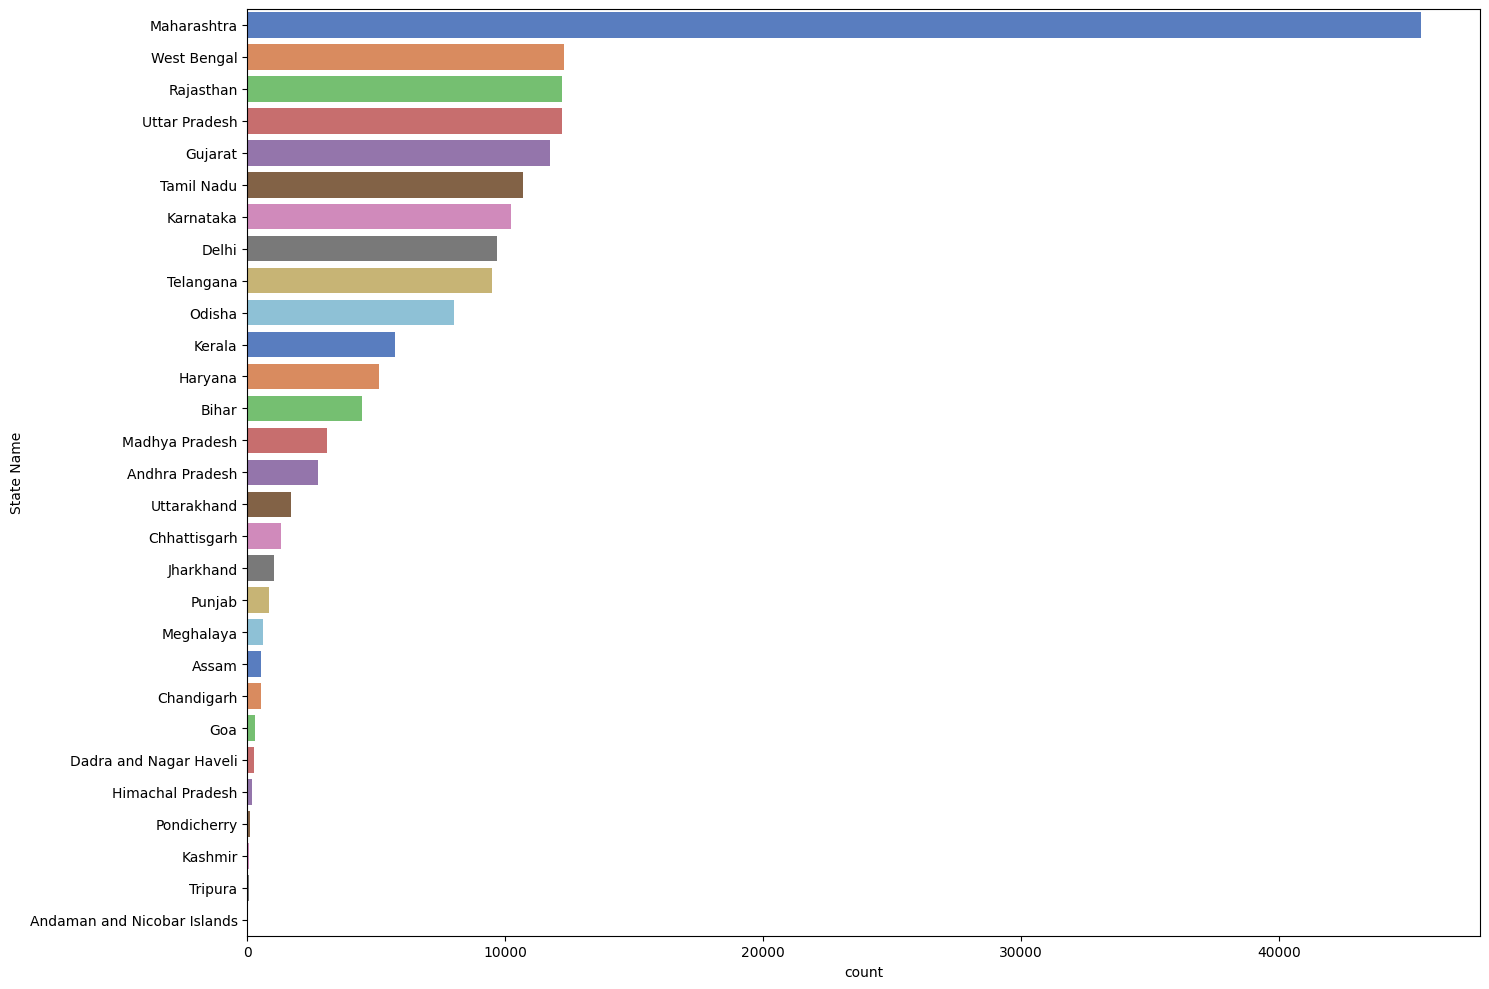

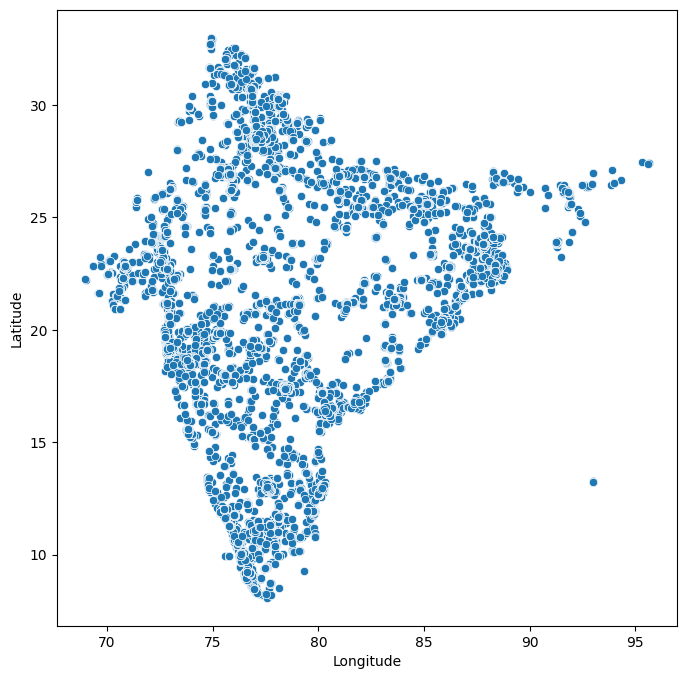

In [142]:
# Count the occurrences of each state
state_counts = df['State Name'].value_counts()

# Plot the countplot with states sorted by count (ascending order)
plt.figure(figsize=[15, 10])
sns.countplot(y=df['State Name'], palette='muted', order=state_counts.index)
plt.tight_layout()
plt.show()
# Displaying the distribution on a map of India using latitude and longitude coordinates.
plt.figure(figsize=[8, 8])
sns.scatterplot(y= df['Latitude'], x = df['Longitude'])
plt.show()

#### Insights - Univariate Analysis
##### 8. State Name
* Inference from Distribution:
There is a higher concentration of data points in Western, Southern, and Northern India, particularly in states like Maharashtra, West Bengal, Rajasthan, Tamil Nadu, Uttar Pradesh, and Gujarat. This trend aligns with the app's reported dominance in Maharashtra, where initial marketing and launch efforts, including pilot testing and awareness campaigns, were focused to evaluate user engagement and app performance before expanding to other states. The concentration in these regions suggests better network infrastructure, higher smartphone penetration, and more active app users, contributing to the app’s adoption.
* The Northeast and Central parts of India (such as Madhya Pradesh, Chhattisgarh, and Bihar) show fewer data points. This could be indicative of lower app adoption in these areas, potentially due to limited network coverage, lower smartphone usage, or lack of targeted marketing.
Similarly, areas like Jammu & Kashmir and the Andaman and Nicobar Islands show minimal user presence, likely reflecting both geographic isolation and lower adoption rates.
* The higher density in metropolitan areas such as Delhi, Mumbai, Chennai, and Bangalore is expected, as urban regions tend to have better mobile network infrastructure and higher smartphone usage, leading to increased app downloads and engagement.
The distribution suggests that more urban users are adopting the MYCall app compared to rural areas, where network issues or lack of awareness may hinder adoption.

* Targeted Marketing: Focus marketing efforts in sparser regions like Northeast and Central India through localized campaigns or partnerships with local telecom operators to increase app adoption.
* Network Infrastructure: Regions with fewer data points may benefit from network improvement initiatives or targeted promotions to boost app usage.
* Urban Expansion: Since the app has strong engagement in urban areas, continuing to strengthen its presence in these cities with additional features or promotions could increase its user base further.
* This distribution offers valuable insights into regional preferences, and understanding these patterns can help refine marketing strategies, app development, and customer engagement efforts.

### Bi-variate Analysis

#### 1. Operator vs Network Type

<Figure size 500x500 with 0 Axes>

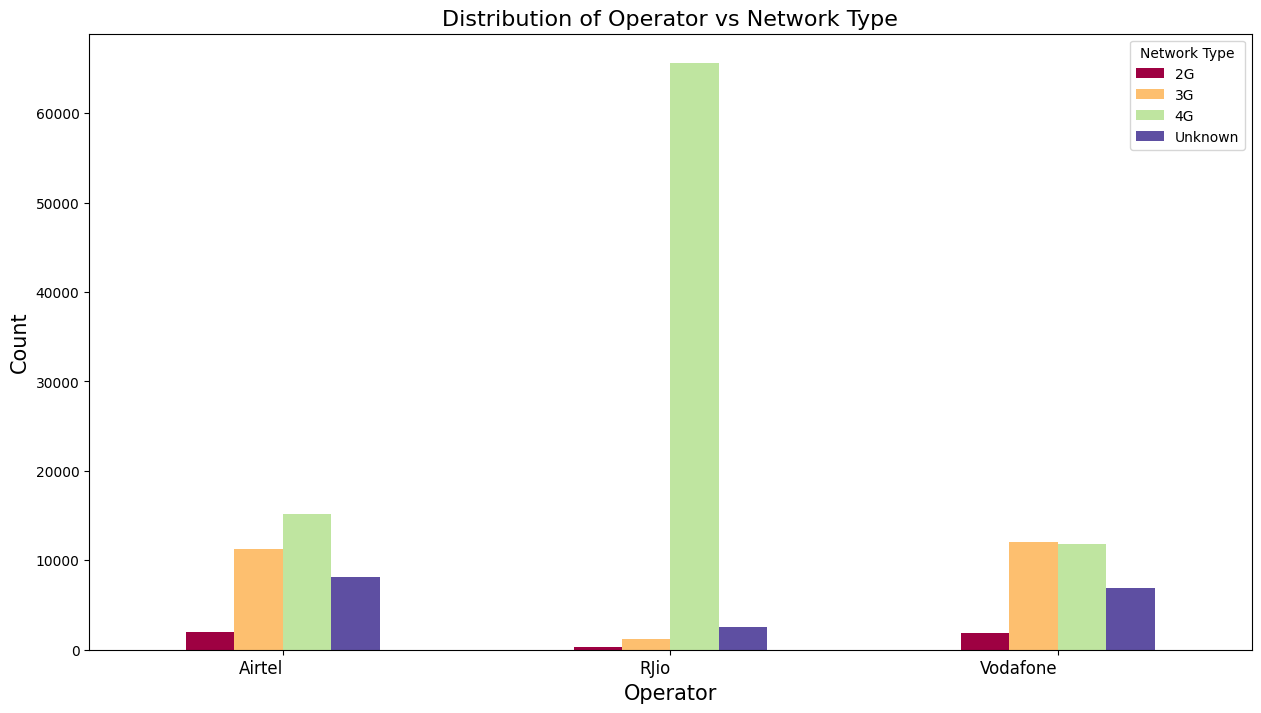

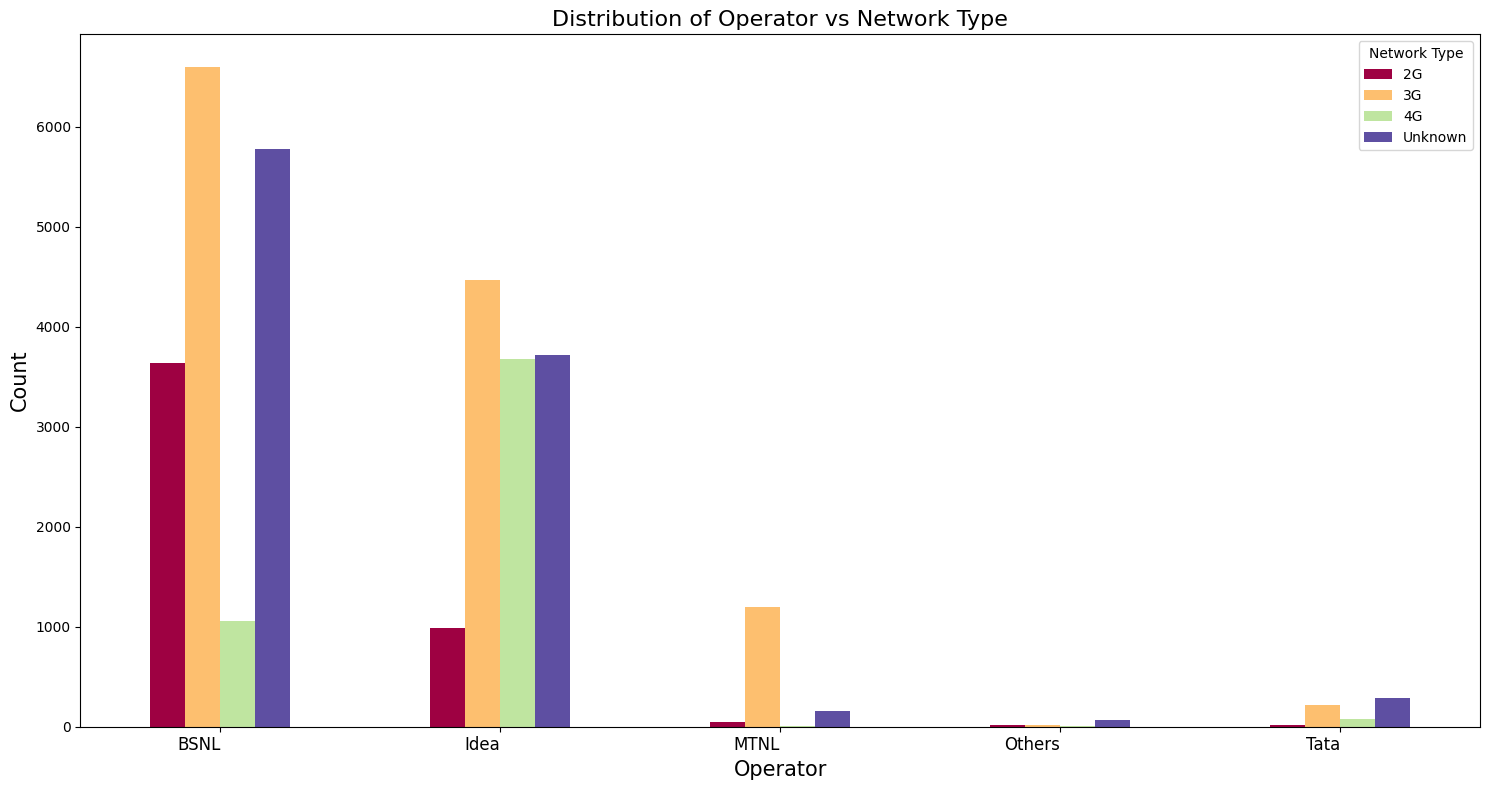

In [146]:
plt.figure(figsize=[5, 5])
# First plot for 'Rjio', 'Airtel', 'Vodafone' - leading Operators
R_A_V = df[df['Operator'].isin(['RJio', 'Airtel', 'Vodafone'])]
pd.crosstab(R_A_V['Operator'], R_A_V['Network Type']).plot(kind='bar', colormap='Spectral')
plt.title("Distribution of Operator vs Network Type", fontsize=16)
plt.xticks(rotation=0, ha='right', fontsize= 12)
plt.xlabel("Operator", fontsize=15)
plt.ylabel("Count", fontsize=15)

# Second plot for others
others = df[df['Operator'].isin(['BSNL', 'Idea','MTNL', 'Tata', 'Others'])]
pd.crosstab(others['Operator'], others['Network Type']).plot(kind='bar', colormap='Spectral')
plt.title("Distribution of Operator vs Network Type", fontsize=16)
plt.xticks(rotation=0, ha='right', fontsize= 12)
plt.xlabel("Operator", fontsize=15)
plt.ylabel("Count", fontsize=15)

# Adjust layout and display all plots
plt.tight_layout()
plt.show()

#### Insights 
* RJio leads with the highest number of 4G users, a result of its aggressive roll-out of 4G infrastructure and disruptive pricing. The company's focus on offering affordable 4G data and free voice calls during its early years enabled it to quickly gain a large market share.
* While Airtel and Vodafone have a significant 4G user base, they still maintain a large 3G user base. This reflects the slower pace at which they transitioned to 4G technology, perhaps due to a larger pre-existing customer base reliant on 3G. 
* BSNL, Idea, and MTNL still had a substantial number of 3G users, indicating that these operators were slower to transition to 4G. This delay can be attributed to factors such as insufficient 4G spectrum, financial constraints, or limited investment in upgrading their infrastructure. Their focus remained on retaining 3G customers, while 4G adoption was relatively slower.


#### 2. Operator vs In_Out_Travelling

<Figure size 500x500 with 0 Axes>

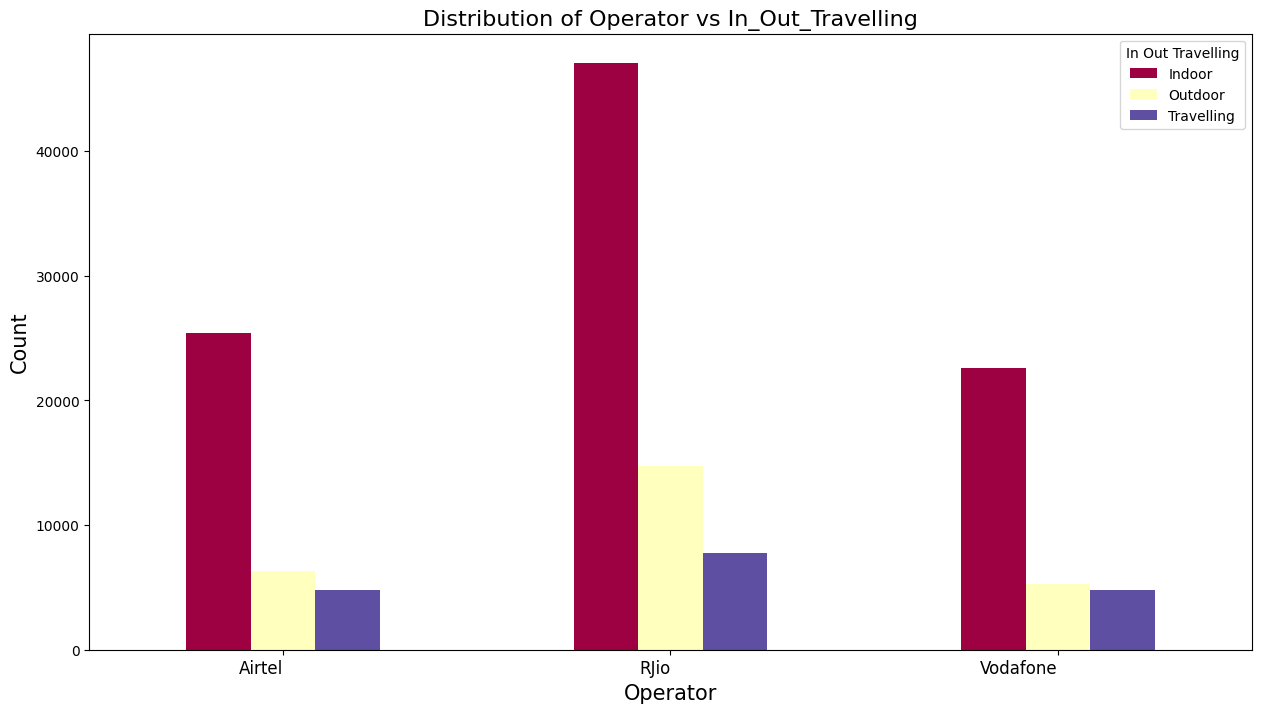

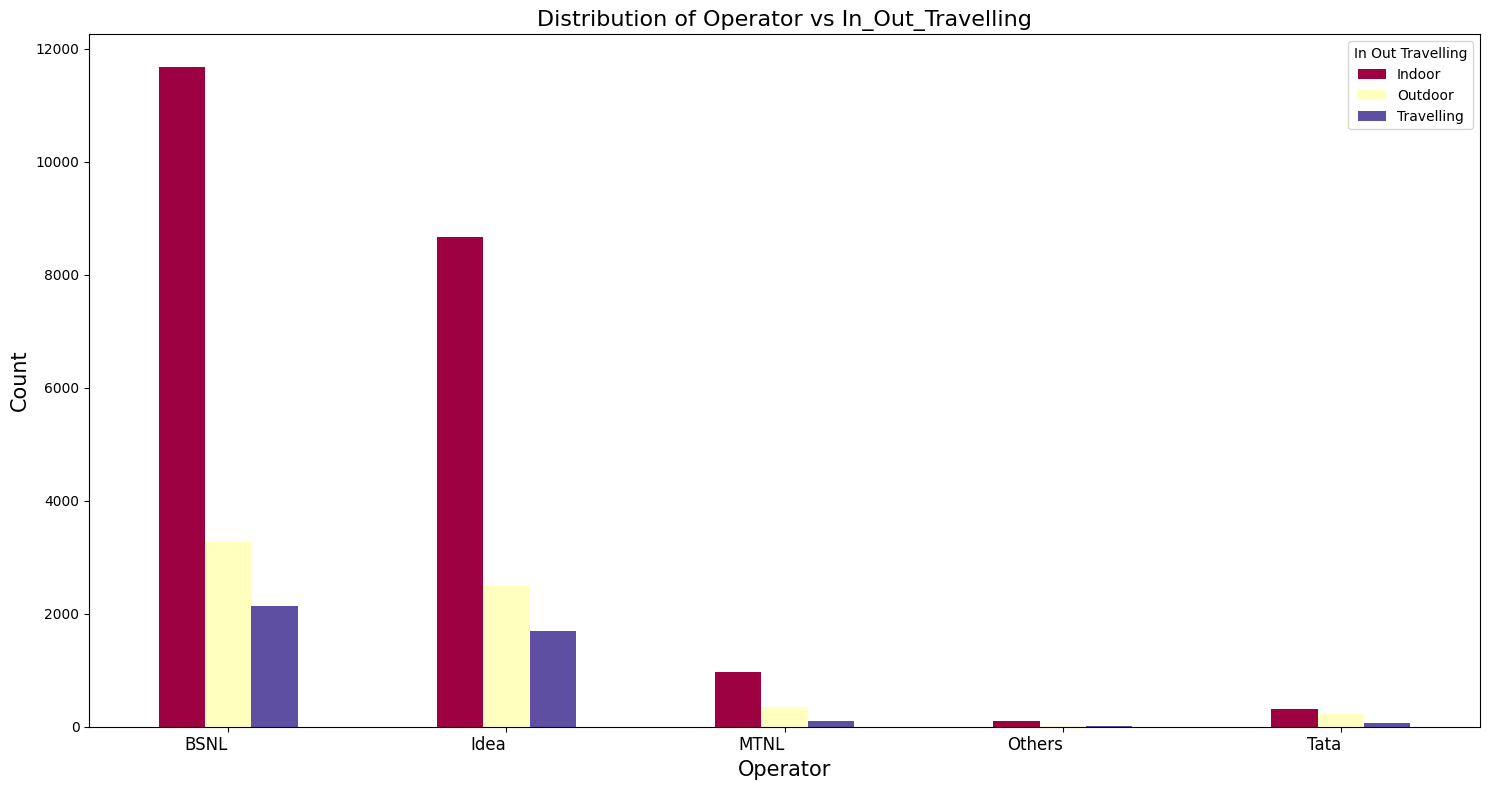

In [149]:
plt.figure(figsize=[5, 5])

# First plot for 'Rjio', 'Airtel', 'Vodafone'
R_A_V = df[df['Operator'].isin(['RJio', 'Airtel', 'Vodafone'])]
pd.crosstab(R_A_V['Operator'], R_A_V['In Out Travelling']).plot(kind='bar', colormap='Spectral')
plt.title("Distribution of Operator vs In_Out_Travelling", fontsize=16)
plt.xticks(rotation=0, ha='right', fontsize= 12)
plt.xlabel("Operator", fontsize=15)
plt.ylabel("Count", fontsize=15)

# Second plot for others
others = df[df['Operator'].isin(['BSNL', 'Idea','MTNL', 'Tata', 'Others'])]
pd.crosstab(others['Operator'], others['In Out Travelling']).plot(kind='bar', colormap='Spectral')
plt.title("Distribution of Operator vs In_Out_Travelling", fontsize=16)
plt.xticks(rotation=0, ha='right', fontsize= 12)
plt.xlabel("Operator", fontsize=15)
plt.ylabel("Count", fontsize=15)

# Adjust layout and display all plots
plt.tight_layout()
plt.show()

#### Insights:
* Across all operators, indoor usage significantly outweighs outdoor and travelling usage, suggesting better connectivity or higher activity in indoor settings.
* Outdoor and travelling categories are led by RJio, Airtel, and Vodafone, likely due to their broader and more modern network infrastructure.
* Operators like BSNL, Idea, MTNL, Tata, and Others have smaller user bases in all activity categories, highlighting their limited coverage or user adoption..


#### 3. Operator vs Rating

<Figure size 500x500 with 0 Axes>

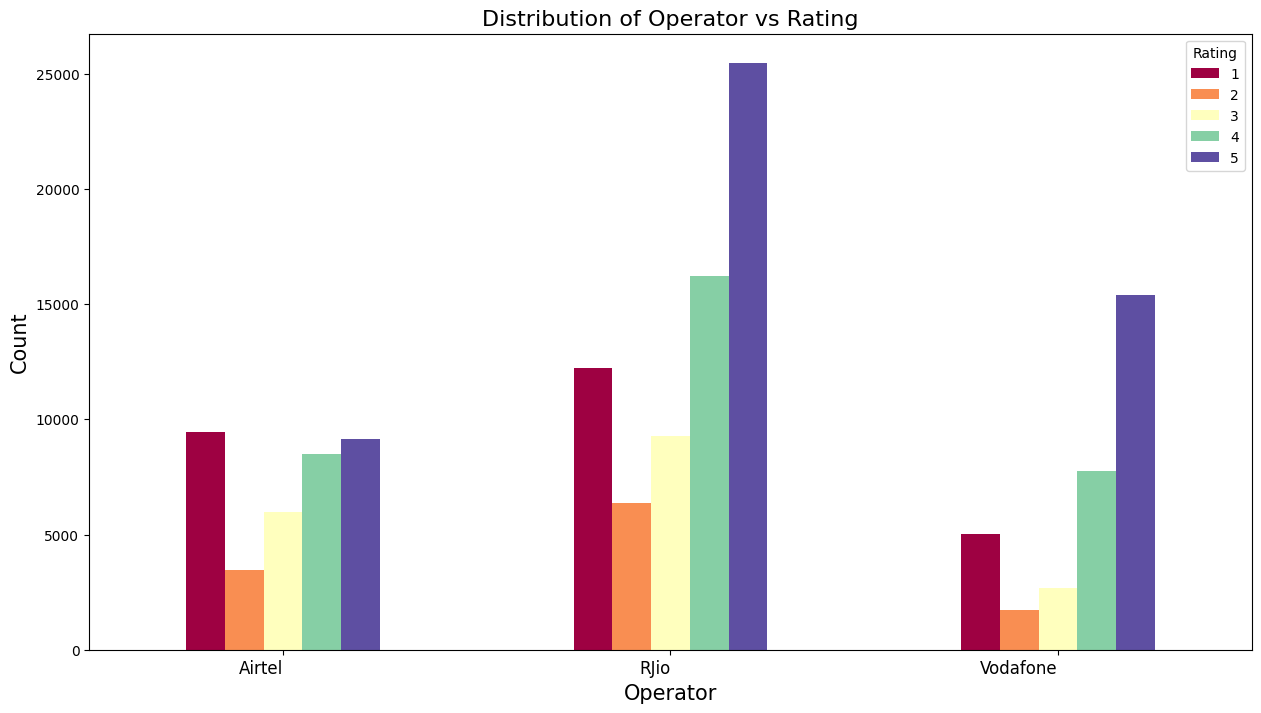

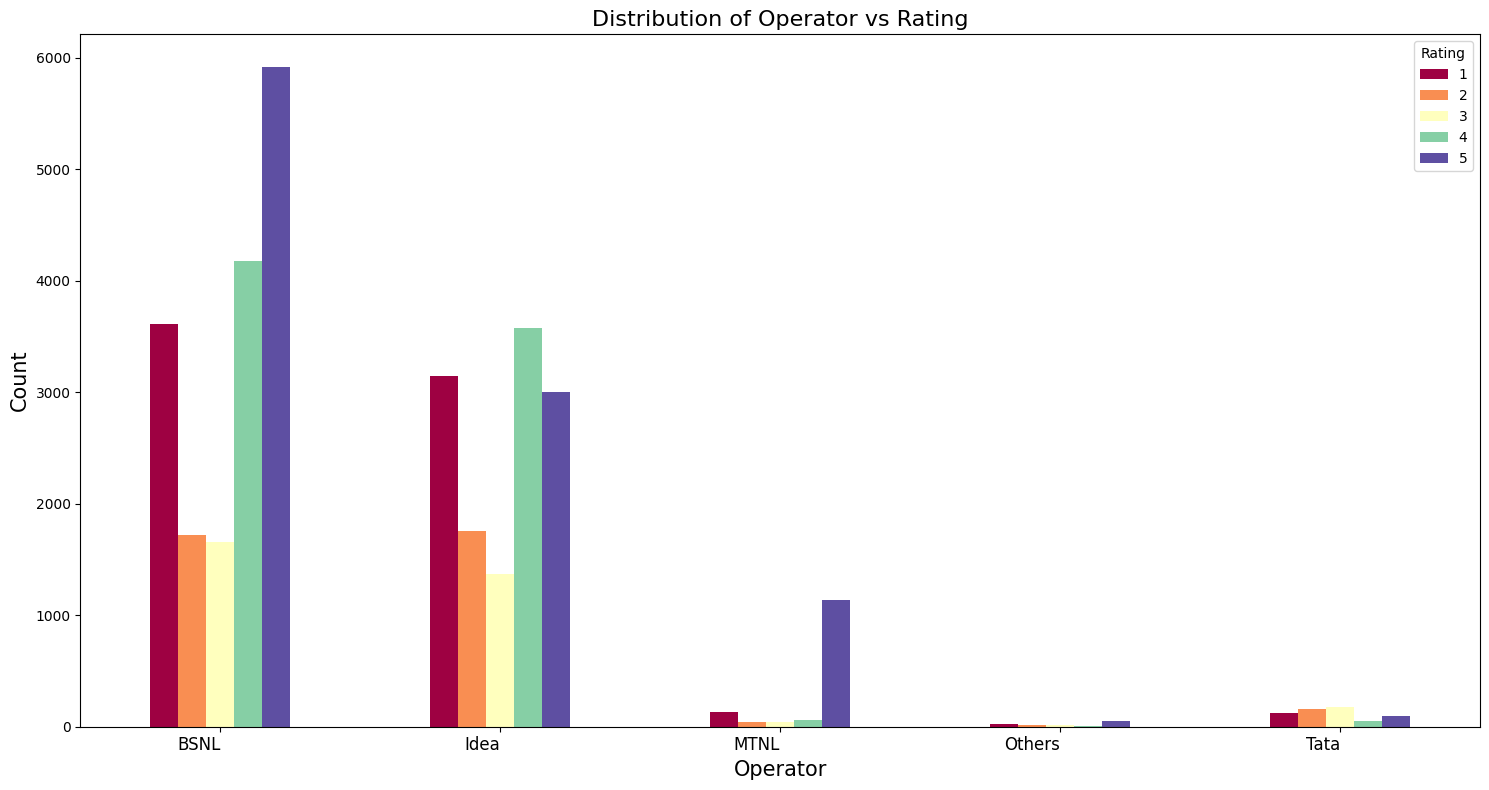

In [152]:
plt.figure(figsize=[5, 5])

# First plot for 'Rjio', 'Airtel', 'Vodafone'
R_A_V = df[df['Operator'].isin(['RJio', 'Airtel', 'Vodafone'])]
pd.crosstab(R_A_V['Operator'], R_A_V['Rating']).plot(kind='bar', colormap='Spectral')
plt.title("Distribution of Operator vs Rating", fontsize=16)
plt.xticks(rotation=0, ha='right', fontsize= 12)
plt.xlabel("Operator", fontsize=15)
plt.ylabel("Count", fontsize=15)

# Second plot for others
others = df[df['Operator'].isin(['BSNL', 'Idea','MTNL', 'Tata', 'Others'])]
pd.crosstab(others['Operator'], others['Rating']).plot(kind='bar', colormap='Spectral')
plt.title("Distribution of Operator vs Rating", fontsize=16)
plt.xticks(rotation=0, ha='right', fontsize= 12)
plt.xlabel("Operator", fontsize=15)
plt.ylabel("Count", fontsize=15)

# Adjust layout and display all plots
plt.tight_layout()
plt.show()

#### Insights :
* RJio dominates Ratings 4 and 5, offering generally good call quality, but the high Rating 1 count suggests localized issues or congestion that need attention.
* Vodafone has a moderate Rating 1 count but a high Rating 5 count, indicating overall good call quality with occasional regional issues.
* Airtel shows near-equal Ratings 1, 4, and 5, indicating significant variability in call quality and the need for improvements in regions with Rating 1.
* Idea mirrors Airtel’s pattern, reflecting inconsistent performance and the need for better network stability and coverage.
* BSNL has a high Rating 1 count, but its Rating 5 count is still noticeable, suggesting inconsistent network quality.
* MTNL has low Rating 1 and high Rating 5 counts, indicating a niche but satisfied user base with limited overall market presence.


#### 4 . Operator vs Average Rating 

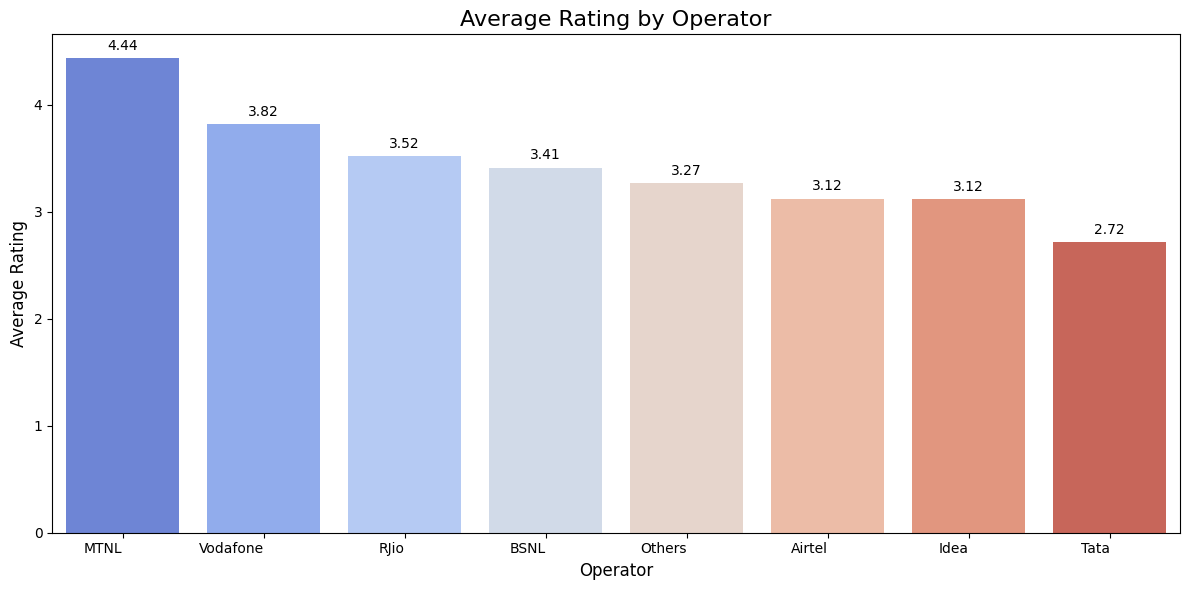

In [155]:
# Group by 'Operator' and calculate the mean of 'Rating'
mean_ratings = df.groupby('Operator')['Rating'].mean().sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=[12, 6])

# Plot the bar chart
sns.barplot(x=mean_ratings.index, y=mean_ratings.values, palette='coolwarm')

# Title and labels
plt.title('Average Rating by Operator', fontsize=16)
plt.xlabel('Operator', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

# Display data labels on top of the bars
for i, v in enumerate(mean_ratings.values):
    plt.text(i, v + 0.05, round(v, 2), ha='center', va='bottom', fontsize=10)

# Adjust x-ticks for better readability
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

#### Insights:
* MTNL stands out with the highest average rating and a satisfied niche user base.
* Vodafone and RJio show good overall quality but with some localized issues, while BSNL exhibits inconsistent service across regions.
* Airtel and Idea need to address significant variability in call quality, and Tata faces the most challenges with the poorest service.


#### 5. Rating vs Call Drop Category

<Figure size 500x500 with 0 Axes>

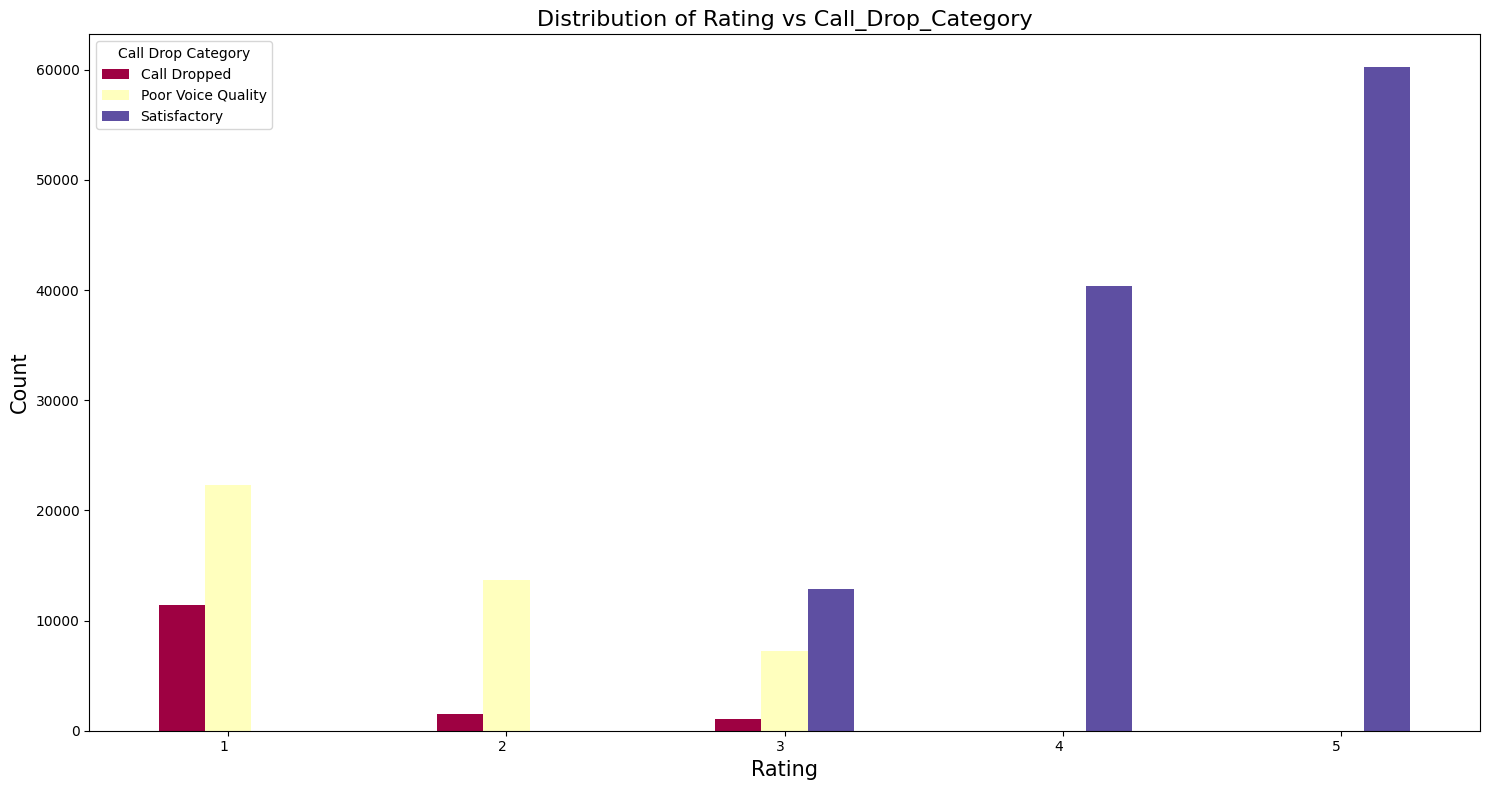

In [158]:
plt.figure(figsize= [5,5])
pd.crosstab(df['Rating'],df['Call Drop Category']).plot(kind = 'bar',colormap = 'Spectral')
plt.title("Distribution of Rating vs Call_Drop_Category", fontsize=16)
plt.xlabel("Rating", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

#### Insights:
* Ratings 1 and 2 indicate poor network quality with high instances of call drops and poor voice quality.
* Rating 3 reflects moderate service with occasional issues but also satisfactory experiences for some users.
* Ratings 4 and 5 show high customer satisfaction, with no significant issues, reflecting strong network performance.

#### 6. Network Type vs Rating

<Figure size 1500x3000 with 0 Axes>

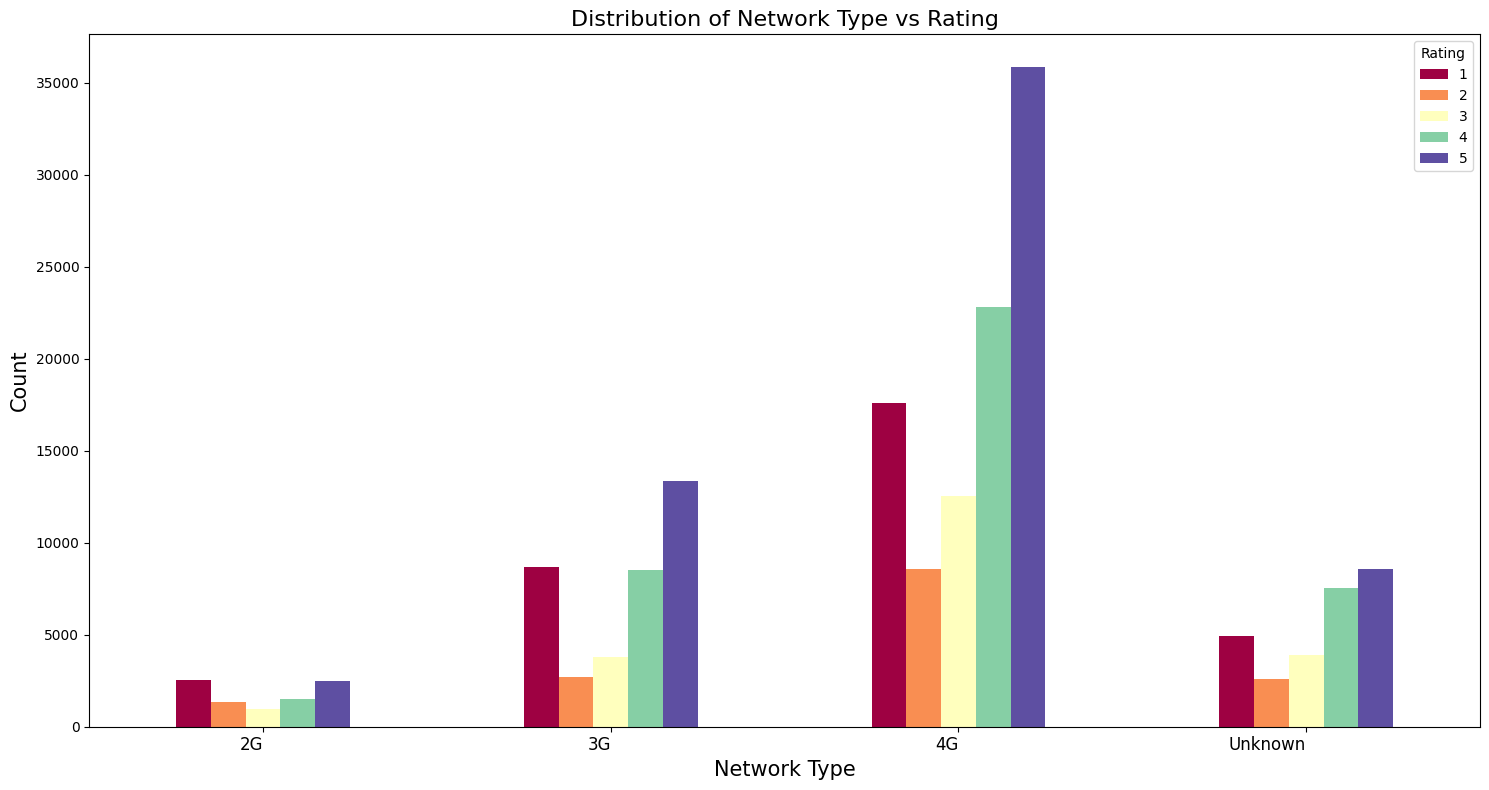

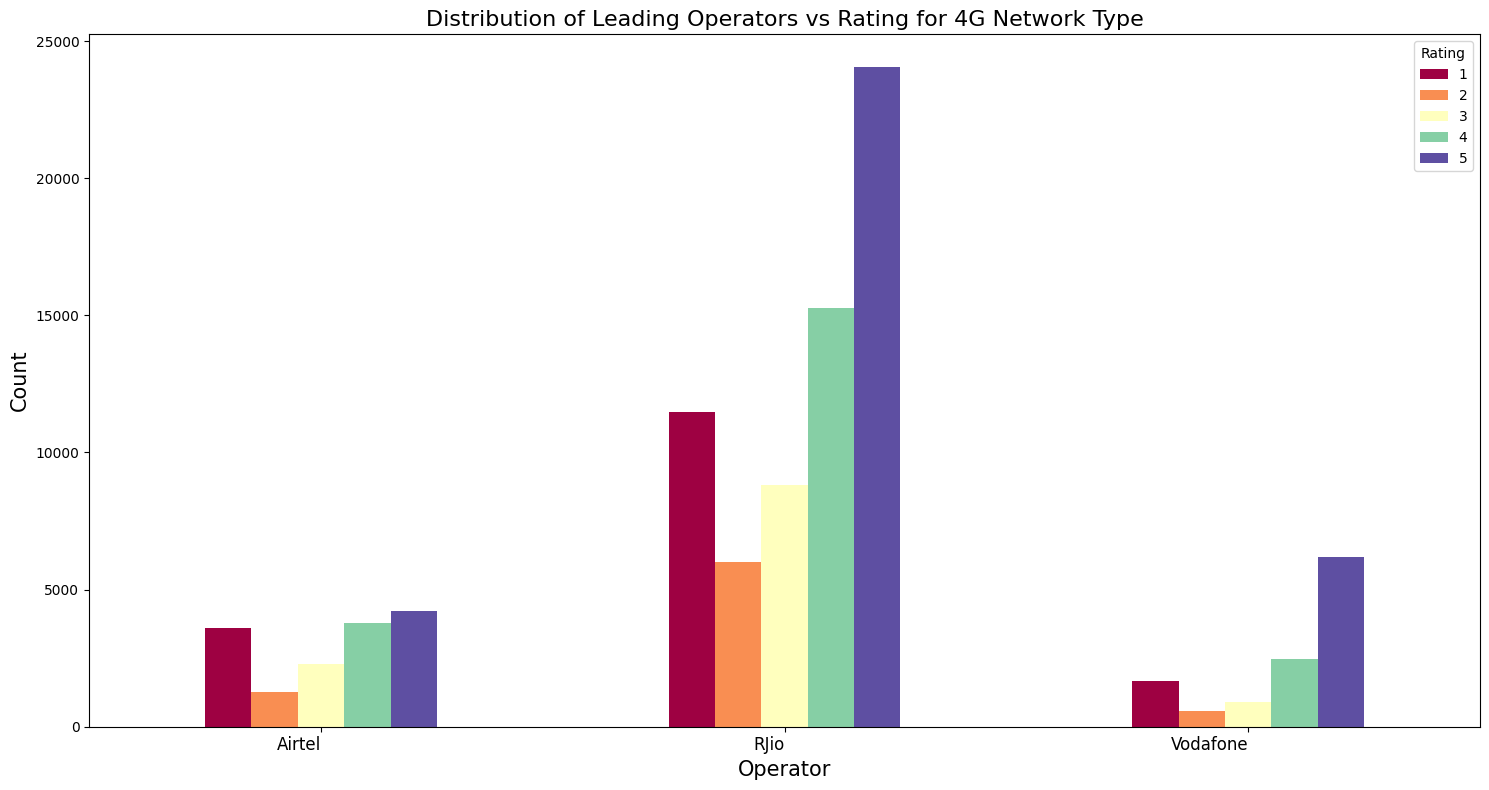

In [161]:
plt.figure(figsize= [15,30])
pd.crosstab(df['Network Type'],df['Rating']).plot(kind = 'bar',colormap = 'Spectral')
plt.title("Distribution of Network Type vs Rating", fontsize=16)
plt.xlabel("Network Type", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=0, ha='right', fontsize= 12)
plt.tight_layout()
plt.show()

# Analyzing the distribution of leading operators and ratings within the active 4G network type.
_4G = df[(df['Network Type']=='4G') & (df['Operator'].isin(['RJio', 'Airtel', 'Vodafone']))]
pd.crosstab(_4G['Operator'],_4G['Rating']).plot(kind = 'bar',colormap = 'Spectral')
plt.title("Distribution of Leading Operators vs Rating for 4G Network Type", fontsize=16)
plt.xlabel("Operator", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=0, ha='right', fontsize= 12)
plt.tight_layout()
plt.show()

#### Insights:
* 2G shows the highest proportion of poor and average experiences (Ratings 1-3), indicating the network’s limitations. However, some users do report satisfactory experiences.
* 
3G provides a better balance, with a larger number of users reporting good to excellent quality (Ratings 4 and 5), though still has significant issues in some areas.
* The higher number of 4G users indicates that it provides the most excellent experiences (Rating 5), but some localized issues affect a segment of users. These issues could stem from network congestion or coverage gaps in less-developed or rural region
* To better understand the 4G pattern among leading operators, we will analyze the data to identify which operator is performing poorly in 4G.
* 
Despite RJio's large user base, Vodafone offers the most consistent 4G experience with fewer poor ratings. Airtel needs improvements in certain areas, while RJio's high Rating 5 count is offset by a significant number of Rating 1 users, highlighting areas for network improvement.


### Multi-variate Analysis

#### 1. Leading Operators & Network Type vs Average Rating 

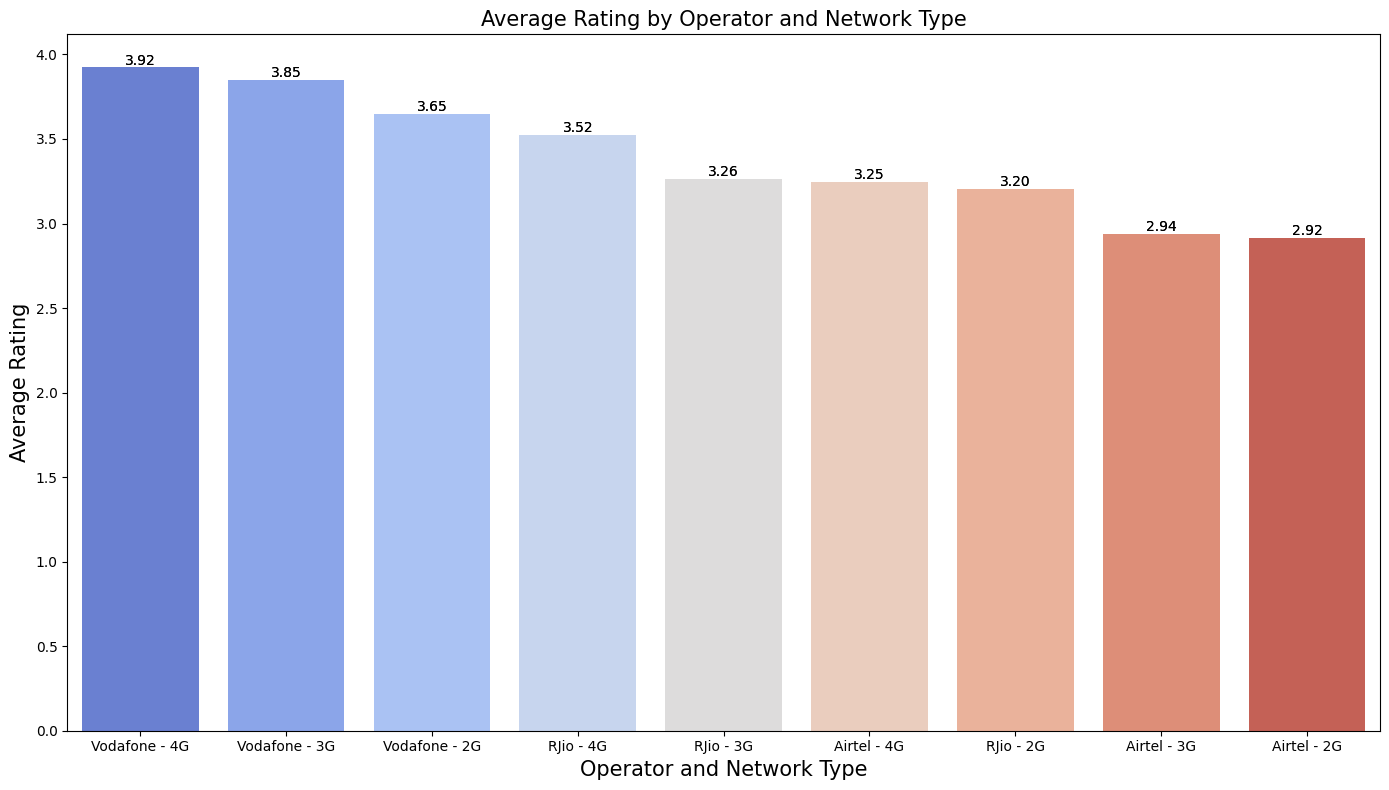

In [165]:
# Group by 'leading Operators' and 'Network Type' and calculate the mean of 'Rating'
r_a_v = df[(df['Network Type'].isin(['2G','3G','4G'])) & (df['Operator'].isin(['RJio', 'Airtel', 'Vodafone']))]
mean_ratings = r_a_v.groupby(['Operator', 'Network Type'])['Rating'].mean().sort_values(ascending=False)

# Flatten the multi-index and create a new column for the combined label
mean_ratings = mean_ratings.reset_index()
mean_ratings['Operator_Network'] = mean_ratings['Operator'] + ' - ' + mean_ratings['Network Type']

# Set the figure size
plt.figure(figsize=[14, 8])

# Create a barplot with the combined 'Operator' and 'Network Type'
sns.barplot(x='Operator_Network', y='Rating', data=mean_ratings, palette='coolwarm')

# Add title and labels
plt.title('Average Rating by Operator and Network Type', fontsize=15)
plt.xlabel('Operator and Network Type', fontsize=15)
plt.ylabel('Average Rating', fontsize=15)
plt.xticks(rotation=0, ha='center')
# Add labels on top of the bars
ax = sns.barplot(x='Operator_Network', y='Rating', data=mean_ratings, palette='coolwarm')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

#### Insights:
* Vodafone Leads in 4G: Vodafone’s 4G network has the highest average rating, suggesting it provides the best user experience among the three operators.
* RJio’s Consistent Performance: RJio’s networks are rated consistently across 4G, but lower than Vodafone’s equivalent network types.
* Airtel’s Improvement Needed: Airtel's network ratings are the lowest across the board, indicating a need for improvement in user experience.


#### 2. Leading Operators & In Out Travelling vs Average Rating 

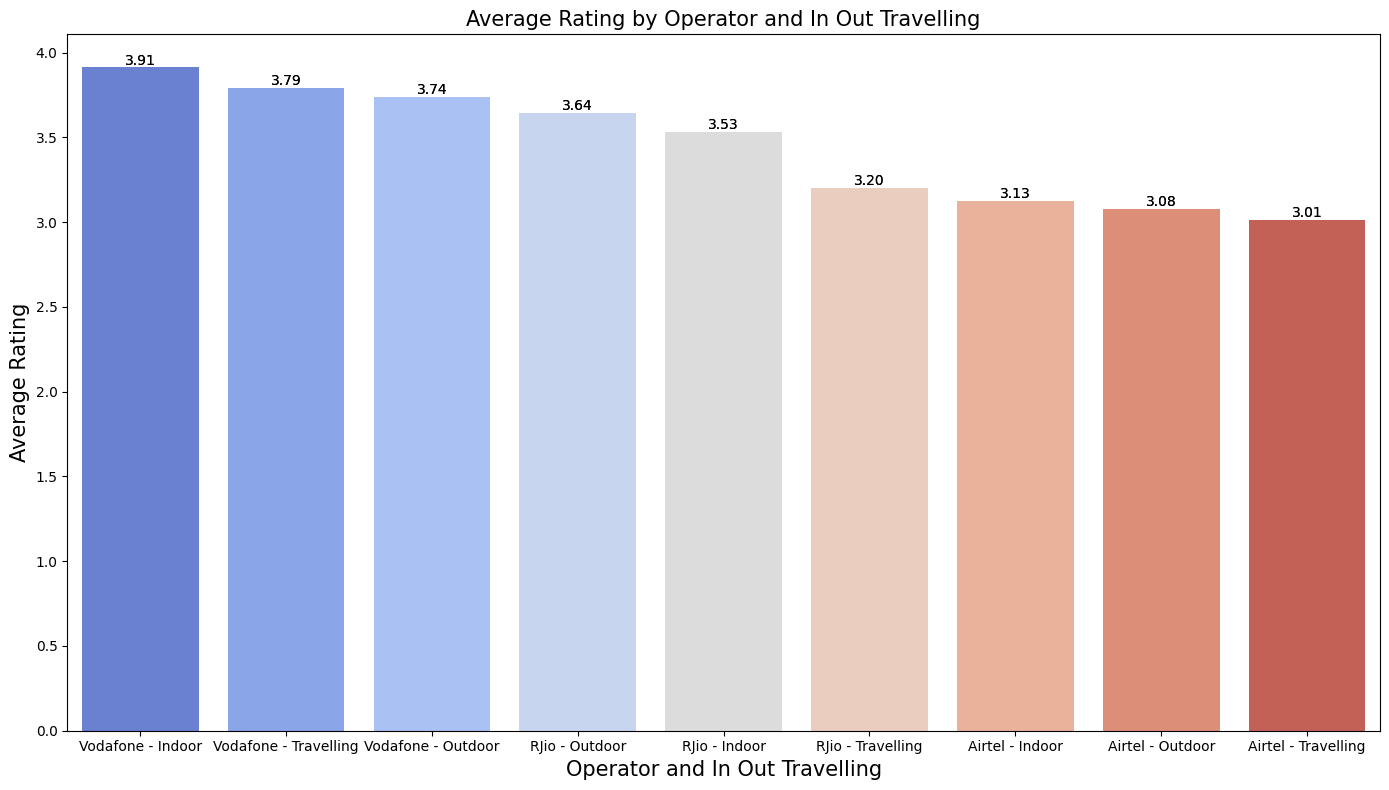

In [168]:
# Group by 'leading Operators' and 'In out Travelling' and calculate the mean of 'Rating'
r_a_v = df[(df['Network Type'].isin(['2G','3G','4G'])) & (df['Operator'].isin(['RJio', 'Airtel', 'Vodafone']))]
mean_ratings = r_a_v.groupby(['Operator', 'In Out Travelling'])['Rating'].mean().sort_values(ascending=False)

# Flatten the multi-index and create a new column for the combined label
mean_ratings = mean_ratings.reset_index()
mean_ratings['Operator_InOutTravel'] = mean_ratings['Operator'] + ' - ' + mean_ratings['In Out Travelling']

# Set the figure size
plt.figure(figsize=[14, 8])

# Create a barplot with the combined 'Operator' and 'Network Type'
sns.barplot(x='Operator_InOutTravel', y='Rating', data=mean_ratings, palette='coolwarm')

# Add title and labels
plt.title('Average Rating by Operator and In Out Travelling', fontsize=15)
plt.xlabel('Operator and In Out Travelling', fontsize=15)
plt.ylabel('Average Rating', fontsize=15)
plt.xticks(rotation=0, ha='center')
# Add labels on top of the bars
ax = sns.barplot(x='Operator_InOutTravel', y='Rating', data=mean_ratings, palette='coolwarm')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

#### Insights:
* Vodafone is the top performer across all categories, providing the best user experience in indoor, outdoor, and traveling environments.
* RJio performs well outdoors and indoors but struggles with consistency while traveling, likely due to signal variability or environmental factors.
* Airtel maintains similar performance across all environments but at a lower overall level compared to Vodafone and RJio.


#### 3. Leading Operators & Region vs Average Rating

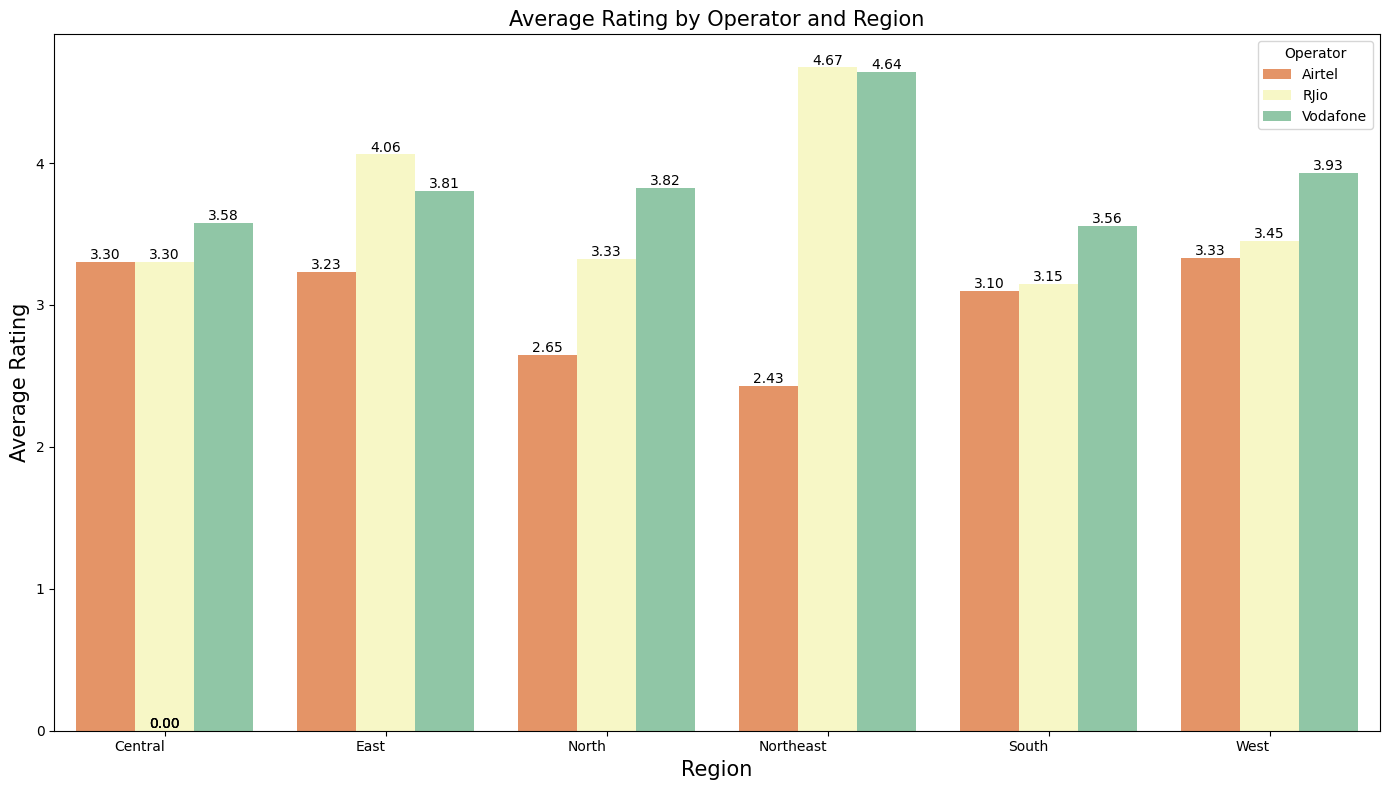

In [171]:
# Group by 'Operator' and 'Region' and calculate the mean of 'Rating'
r_a_v = df[(df['Network Type'].isin(['2G','3G','4G'])) & (df['Operator'].isin(['RJio', 'Airtel', 'Vodafone']))]
mean_ratings = r_a_v.groupby(['Region', 'Operator'], sort=True)['Rating'].mean()

# Flatten the multi-index and reset it to make a DataFrame
mean_ratings = mean_ratings.reset_index()

# Set the figure size
plt.figure(figsize=[14, 8])

# Define the desired hue order for Operators
hue_order = sorted(mean_ratings['Operator'].unique())

# Create a barplot with 'Region' on the x-axis and 'Operator' as hue
ax = sns.barplot(x='Region', y='Rating', hue='Operator', data=mean_ratings, palette= 'Spectral' , hue_order=hue_order)

# Add title and labels
plt.title('Average Rating by Operator and Region', fontsize=15)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Average Rating', fontsize=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='right')

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()

#### Insights:
* Vodafone: Consistently high ratings across all regions, particularly strong in the North East region. This suggests that Vodafone has robust network performance and high user satisfaction.
* RJio: Highest ratings in the East and Northeast regions, indicating excellent performance there. RJio also performs well in the West region but has room for improvement in other regions.
* Airtel: Lowest ratings in most regions, especially in the North and Northeast. This indicates a need for significant improvement in network performance and user satisfaction.
* The varying ratings across regions might reflect differences in network infrastructure, service quality, and user experience, which could be influenced by factors like coverage, network speed, and customer support.
The higher ratings for RJio and Vodafone in certain regions could also indicate stronger market penetration and greater customer satisfaction in those areas.

#### 3. Leading Operators vs Low Rating

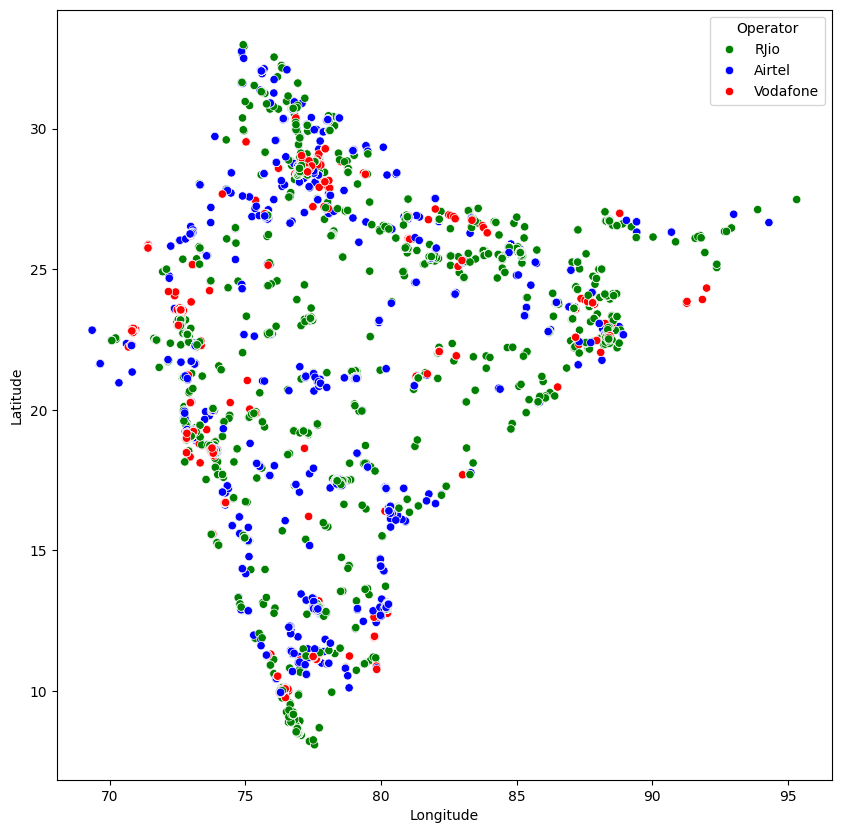

In [174]:
# Displaying the distribution on India map using latitude and longitude coordinates - to show the areas with low rating 
r_a_v_12rating = df[(df['Network Type'].isin(['2G','3G','4G'])) & (df['Operator'].isin(['RJio', 'Airtel', 'Vodafone'])) & (df['Rating'].isin([1,2]))]
plt.figure(figsize=[10, 10])
sns.scatterplot(y= r_a_v_12rating['Latitude'], x = r_a_v_12rating['Longitude'], hue = r_a_v_12rating['Operator'], palette= ['Green' , 'blue','red'])
plt.show()

#### Insights:
* Regions with Overall Poor Performance (All Networks):
The North Indian region (specifically around state borders of Punjab, Haryana, Himachal Pradesh, and Uttarakhand) and some parts of West Bengal and Maharashtra are showing dense clusters where all three networks (RJio, Airtel, and Vodafone) perform poorly.
These regions could be geographically challenging areas (e.g., hilly terrain, border regions) or underserved due to infrastructure limitations.
Collaborative or independent infrastructure development is necessary in these areas to improve connectivity for all operators.

* RJio shows high-density clusters of low ratings in Kerala, Gujarat, Telangana, and Odisha. These regions might be experiencing significant network congestion or coverage gaps despite being highly active areas for RJio users.
Immediate measures should be taken to analyze and optimize network performance in these regions due to their dense user base.
Apart from the dense clusters, RJio's network issues appear sporadically across the rest of the country, with lower density. This suggests that overall, RJio is doing better in most regions, but isolated pockets of issues remain.

* Airtel's low performance is scattered across the country rather than being concentrated in specific regions.
This pattern indicates widespread but less severe network issues, possibly related to capacity constraints or inconsistent service quality.
Airtel should prioritize improving its network stability and capacity across diverse geographies instead of focusing on specific regions.

* Vodafone's low ratings are concentrated on the periphery of the country rather than the central regions.
This pattern suggests that Vodafone may have weaker infrastructure or coverage in border areas and coastal regions, potentially due to lower investment or geographical challenges.

#### Presence of outliers and its treatment:

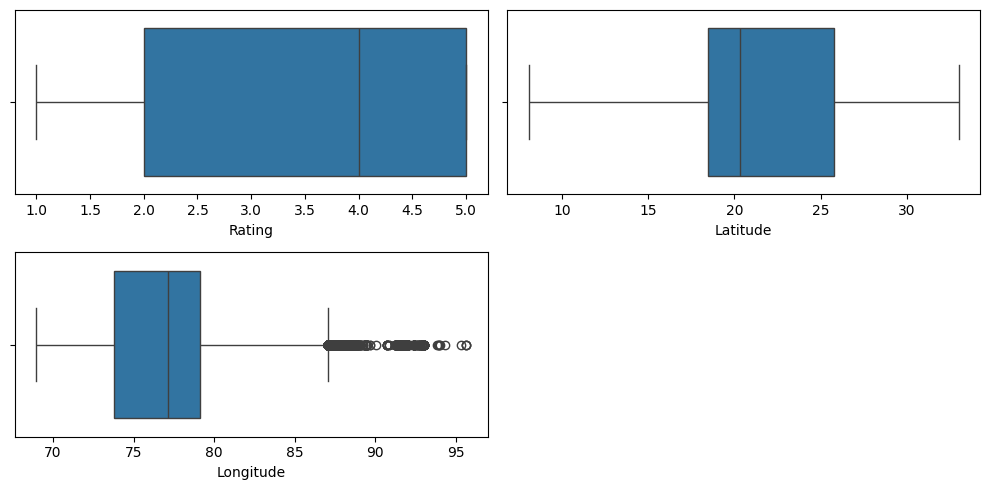

In [234]:
plt.figure(figsize= [10,5])
t = 1 
for i in df.select_dtypes(include = np.number).columns:
    plt.subplot(2,2,t)
    sns.boxplot(x = df[i])
    t += 1
plt.tight_layout()
plt.show()

#### Inference
In the dataset, most features are categorical, so outliers are not a concern for those variables. However, the longitude feature contains some extreme values that might be considered outliers in a typical dataset. These outliers, however, represent valid geographic locations on the Earth's surface. Removing or adjusting these values could lead to the loss of important insights related to remote areas or regions with unique network behaviors. Since geographic data is crucial for understanding regional patterns in call quality, we choose not to treat these longitude outliers, as each point is valuable for the analysis.